# **Reinforcement Learning on FrozenLake and CartPole Environments**

**Author**: Fajri Nurfauzan  
**NIM**: 2101221040  
**Date**: June 13, 2023

[<img src="https://raw.githubusercontent.com/edent/SuperTinyIcons/master/images/svg/github.svg" width="20"> View on GitHub](https://github.com/fajrinurf/Reinforcment-Learning-Exercise/blob/main/Frozen-Lake-Coba.ipynb) | [<img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="20"> Open in Colab](https://colab.research.google.com/drive/1YzLWOCgxDmrqkCqwFs7yKSYNM87wf_bF?usp=sharing)

# **Reinforcement Learning: Pengenalan**

Di dalam Tutorial ini, akan menjelaskan penggunaan Reinforcement Learning dasar yang akan digunakan, dan juga untuk memenuhi tugas kuliah Advance Machine Learning. Referensi yang akan digunakan di dalam tutorial ini akan berbasis dari buku dan juga paper. untuk kasus yang akan dijelaskan disini adalah penggunaan Reinforcement Learning yang akan menerapkan metode Q-learning dan SARSA untuk [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/) klasik Puzzle. 

<!-- ![alt text](https://media2.giphy.com/media/46ib09ZL1SdWuREnj3/giphy.gif?cid=3640f6095c6e92762f3446634d90bc65) ![alt text](https://media0.giphy.com/media/d9QiBcfzg64Io/200w.webp?cid=3640f6095c6e93e92f30655873731752)![alt text](https://i.gifer.com/GpAY.gif) -->

Reinforcement Learning bisa beroperasi dengan melakukan indentifikasi pola yang akan digunakan secara optimal, di dalam konteks dari masalah masalah yang diberikan, sehingga agen pada reinforcement learning dapat membuat keputusan terbaik untuk langkah berikutnya.

In [1]:
import numpy as np                                          # Digunakan untuk operasi matematika dan manipulasi array.
import matplotlib.pyplot as plt                             # Digunakan untuk visualisasi data.
import random                                               # Digunakan untuk menghasilkan bilangan acak.
import gym                                                  # Digunakan untuk mengakses environment OpenAI Gym.
from tqdm.notebook import tqdm                              # Digunakan untuk membuat progress bar.
import os                                                   # Digunakan untuk mengakses file dan direktori.
from moviepy.editor import ImageSequenceClip                # Digunakan untuk membuat video dari gambar.
from IPython.display import Image                           # Digunakan untuk menampilkan gambar.
from collections import defaultdict                         # Digunakan untuk membuat dictionary dengan nilai default.

# **Frozen Lake**

Frozen Lake environment adalah dunia kisi yang tidak pasti di mana seseorang memulai dari keadaan awal (kotak paling atas di sebelah kiri) untuk menuju ke keadaan akhir (kotak paling bawah di sebelah kanan). Environment yang tidak pasti di mana seseorang memulai dari keadaan yang berjalan di danau beku dengan ketebalan es yang bervariasi. Karena itu seseorang dapat jatuh ke air di kotak tertentu. Selain itu, esnya lebih licin di beberapa tempat, jadi mengambil langkah dapat membawa Anda lebih jauh dari yang diharapkan dan jika angin kencang.

Percobaan disini akan menggunakan SARSA, Q-Learning dan juga Monte Carlo

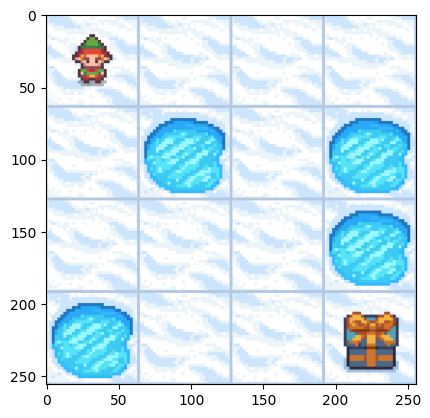

In [2]:
# Membuat lingkungan FrozenLake dengan mode render "rgb_array" dan kondisi licin (is_slippery=True)
env = gym.make("FrozenLake-v1",render_mode="rgb_array",is_slippery=True) # Membuat lingkungan FrozenLake

# Mereset lingkungan
env.reset()

# Menampilkan lingkungan
plt.imshow(env.render())

### Pengenalan Lingkungan Frozen Lake

In [3]:
# Mendapatkan jumlah state dalam lingkungan
numStates = env.observation_space.n
print("there are ", numStates, "states\n") # Menampilkan jumlah state

there are  16 states



In [4]:
# Mendapatkan jumlah aksi yang mungkin dalam lingkungan
numActions = env.action_space.n
print("There Are ", numActions, "actions\n") # Menampilkan jumlah aksi
print("0: LEFT \n1: DOWN \n2: RIGHT \n3: UP) \n") # Menampilkan aksi yang mungkin

There Are  4 actions

0: LEFT 
1: DOWN 
2: RIGHT 
3: UP) 



In [5]:
# Mendapatkan rentang reward dalam lingkungan
rewards=env.reward_range
print("rewards:",rewards) # Menampilkan rentang reward
print("Reach goal(G): +1 \nReach hole(H): 0\nReach frozen(F): 0\n") # Menampilkan reward yang mungkin

rewards: (0, 1)
Reach goal(G): +1 
Reach hole(H): 0
Reach frozen(F): 0



In [6]:
# Menampilkan matriks transisi
print("{action: P[s’], s’, r, done }") 
print(env.env.P[0]) # Menampilkan matriks transisi untuk state 0

{action: P[s’], s’, r, done }
{0: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)], 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)], 2: [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)], 3: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]}


In [7]:
# Fungsi untuk encode dan decode state. Dalam kasus ini, tidak melakukan apa-apa karena state sudah dalam bentuk yang bisa diproses.
def encode(state):
    return state
def decode(state):
    return state

### Random Strategy

In [8]:
# Strategi aksi yang diambil secara acak
def strategie_aleatoire():
    return(random.choice([0,1,2,3]))

In [9]:

# Fungsi untuk mengevaluasi strategi acak
def evaluer_aleatoire(nbr=1000): # nbr: jumlah episode yang akan dievaluasi
    nbr=0 # Inisialisasi jumlah episode
    obs_i, _ =env.reset() # Mereset lingkungan
    done=False # Inisialisasi kondisi episode
    frame=[] # Inisialisasi frame
    
    while not done: # Looping sampai episode selesai
        action=random.choice([0,1,2,3]) # Mengambil aksi secara acak
        obs_j, reward, done,_,_=env.step(action) # Melakukan aksi dan mendapatkan hasilnya
        frame.append(env.render()) # Menambahkan frame
        nbr=nbr+1 # Menambahkan jumlah episode
    print("Episode ended after {} iterations".format(nbr)) # Menampilkan jumlah episode
    print("Average Achieved Rewards:",reward) # Menampilkan rata-rata reward
    clip=ImageSequenceClip(frame, fps=10).resize(1.0) # Membuat video dari frame
    clip.write_gif("FrozenLake_Rate_Randomly.gif", fps=10) # Menyimpan video

Episode ended after 9 iterations
Average Achieved Rewards: 0.0
MoviePy - Building file FrozenLake_Rate_Randomly.gif with imageio.


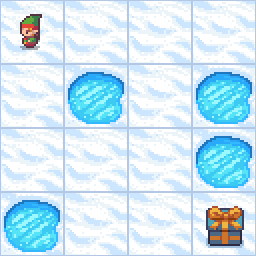

In [10]:
# Menjalankan dan mengevaluasi strategi acak
evaluer_aleatoire()

# Menampilkan hasil dalam bentuk GIF
Image(filename="FrozenLake_Rate_Randomly.gif")

### 1) $\epsilon$-greedy

In [11]:
# Fungsi untuk melakukan pemilihan aksi berdasarkan distribusi probabilitas
def draw(q_s): # q_s: distribusi probabilitas
    i=np.random.choice(len(q_s),1, p=q_s)[0] # Mengambil aksi berdasarkan distribusi probabilitas
    return i # Mengembalikan aksi

In [12]:
# Fungsi untuk melakukan pemilihan aksi berdasarkan strategi epsilon-greedy
def epsGreedy(epsilon, q_s): # epsilon: probabilitas eksplorasi, q_s: distribusi probabilitas
    x = random.uniform(0,1) # Mengambil bilangan acak antara 0 dan 1
    if x<epsilon: # Jika bilangan acak lebih kecil dari epsilon
        return(draw(np.ones(len(q_s))*(1/len(q_s)))) # Mengambil aksi secara acak
    else:
        argmax=q_s==max(q_s) # Mengambil aksi dengan nilai q_s terbesar
        return(draw(np.array([1/sum(argmax) if argmax[k] else 0 for k in range(len(q_s))]))) # Mengambil aksi berdasarkan distribusi probabilitas

### 2) Test A Policy

In [13]:
# Fungsi untuk melakukan evaluasi policy
def policy_evaluation(q,gamma,nbr=1000,nombre_iteration=False,gif=False): # q: policy, gamma: discount factor, nbr: jumlah iterasi, nombre_iteration: menampilkan waktu, gif: menampilkan lingkungan
    s=0 # inisialisasi return
    if nombre_iteration : k=0 # inisialisasi waktu
    if gif :frame=[] # inisialisasi frame
    for i in range(nbr): # melakukan iterasi sebanyak nbr
        obs_i, _ =env.reset()  # menginisialisasi lingkungan dan mengekstrak state awal
        if (i==0) and  gif :frame.append(env.render()) # menampilkan lingkungan
        done=False # inisialisasi kondisi berhenti
        G=0 # inisialisasi return
        h=0 # inisialisasi waktu
        while not done: # melakukan iterasi sampai kondisi berhenti
            obs_j, reward, done,_,_=env.step(epsGreedy(0, q[encode(obs_i)])) # melakukan aksi berdasarkan strategi epsilon-greedy
            if (i==0) and  gif :frame.append(env.render()) # menampilkan lingkungan
            obs_i=obs_j # mengupdate state
            G=G+reward*pow(gamma,h) # mengupdate return
            h=h+1 # mengupdate waktu
        if nombre_iteration : k=k+h # mengupdate waktu
        s=s+G # mengupdate return
    s=s/nbr # menghitung rata-rata return
    if nombre_iteration and gif : # menampilkan lingkungan
        k=k//nbr # menghitung rata-rata waktu
        return [s,k,frame] # mengembalikan return, waktu, dan frame
    elif nombre_iteration: # mengembalikan return dan waktu
        k=k//nbr # menghitung rata-rata waktu
        return[s,k] # mengembalikan return dan waktu
    else: # mengembalikan return
        return s  # mengembalikan return

### 3) Visualization

In [14]:
# Fungsi untuk menampilkan tabel Q untuk FrozenLake 4x4 dan 8x8
def plotQ(q_table, map_size): # q_table: tabel Q, map_size: ukuran lingkungan
    # Membuat lingkungan
    if (map_size==4): # Jika ukuran lingkungan 4x4
        MAP = [ 
            "SFFF",
            "FHFH",
            "FFFF",
            "HFFG"
        ]
    else:
        MAP=[
            "SFFFFFFF",
            "FFFFFFFF",
            "FFFHFFFF",
            "FFFFFHFF",
            "FFFHFFFF",
            "FHHFFFHF",
            "FHFFHFHF",
            "FFFHFFFG"
        ]
    best_value = np.max(q_table, axis = 1).reshape((map_size,map_size)) # Mengambil nilai Q terbesar
    best_policy = np.argmax(q_table, axis = 1).reshape((map_size,map_size)) # Mengambil aksi terbaik
    
    fig, ax = plt.subplots() # Membuat figure
    im = ax.imshow(best_value) # Membuat visualisasi tabel Q

    for i in range(best_value.shape[0]): # Menampilkan panah
      for j in range(best_value.shape[1]): # Menampilkan panah
          if MAP[i][j] in 'GH': # Jika state adalah goal atau hole
              arrow = MAP[i][j] # Menampilkan goal atau hole
          elif best_policy[i, j] == 0: # Jika aksi terbaik adalah 0
              arrow = '<' # Menampilkan panah ke kiri
          elif best_policy[i, j] == 1: # Jika aksi terbaik adalah 1
              arrow = 'v' # Menampilkan panah ke bawah
          elif best_policy[i, j] == 2: # Jika aksi terbaik adalah 2
              arrow = '>' # Menampilkan panah ke kanan
          elif best_policy[i, j] == 3: # Jika aksi terbaik adalah 3
              arrow = '^' # Menampilkan panah ke atas
          if MAP[i][j] in 'S': # Jika state adalah start
              arrow = 'S ' + arrow # Menampilkan start dan panah
          text = ax.text(j, i, arrow, ha = "center", va = "center", color = "black") # Menampilkan panah
            
    cbar = ax.figure.colorbar(im, ax = ax) # Menampilkan colorbar
    
    fig.tight_layout() # Menampilkan figure
    plt.show()  # Menampilkan figure
    # (Kode ini untuk menampilkan tabel Q dalam bentuk visual)

In [15]:
# Fungsi untuk menampilkan hasil evaluasi dan tabel Q
def plot(q,evaluation,taille=4,plot_Q=True,gamma=1): # q: policy, evaluation: hasil evaluasi, taille: ukuran lingkungan, plot_Q: menampilkan tabel Q, gamma: discount factor
    #plot evaluation
    if type(evaluation[0])==np.ndarray: # Jika hasil evaluasi adalah array
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Membuat figure
        ax1.plot([i * 1000 for i in range(len(evaluation[:,0]))],evaluation[:,0],"r") # Menampilkan hasil evaluasi
        ax1.title.set_text("average gain") # Menampilkan judul
        ax2.plot([i * 1000 for i in range(len(evaluation[:,1]))],evaluation[:,1],"b") # Menampilkan hasil evaluasi
        ax2.title.set_text("number of time steps") # Menampilkan judul
    else:
        plt.figure(figsize=(20,7)) # Membuat figure 
        plt.plot([i * 1000 for i in range(len(evaluation))], evaluation,"r") # Menampilkan hasil evaluasi
        plt.xlabel('episode') # Menampilkan label sumbu x
        plt.ylabel('average gain') # Menampilkan label sumbu y
    plt.show() # Menampilkan figure
    #plotQ only for FrozenLake
    if plot_Q: plotQ(q,taille) # Menampilkan tabel Q
    s,k,frame=policy_evaluation(q,gamma,nbr=1000,nombre_iteration=True,gif=True) # Menampilkan hasil evaluasi
    print("Episode finished after {} average iterations".format(k)) # Menampilkan hasil evaluasi
    print("Average obtained rewards:",s) # Menampilkan hasil evaluasi
    return(frame)
    # (Kode ini untuk menampilkan grafik evaluasi dan tabel Q)


### 4) Algorithm

#### A) SARSA

In [16]:
# Fungsi untuk melakukan algoritma SARSA
def sarsa(gamma,nbr,Nombre_etat,alpha=0.02,eps=0.2,nbr_eval=1000,nbr_iteration=False,eps_variable=False,freq_eval=1000): # gamma: discount factor, nbr: jumlah episode, Nombre_etat: jumlah state, alpha: learning rate, eps: nilai epsilon, nbr_eval: jumlah evaluasi, nbr_iteration: jumlah iterasi, eps_variable: nilai epsilon berubah, freq_eval: frekuensi evaluasi
    # Inisialisasi tabel Q
    q = np.zeros((Nombre_etat,env.action_space.n)) # Menginisialisasi tabel Q
    evaluation=[] # Menginisialisasi hasil evaluasi
    epsilon=eps # Menginisialisasi nilai epsilon
    
    for i in tqdm(range(nbr)): # Melakukan iterasi sebanyak jumlah episode
        # Menginisialisasi state
        obs_i,_ = env.reset() # Menginisialisasi state
        done=False # Menginisialisasi kondisi episode selesai
        # Memilih aksi berdasarkan strategi epsilon-greedy
        action=epsGreedy(epsilon,q[encode(obs_i)]) 
        
        # Melakukan iterasi sampai episode selesai
        while not done: 
            # Melakukan aksi dan mendapatkan reward dan state baru
            obs_j, reward, done,_,_=env.step(action)
            # Jika episode selesai, update tabel Q
            if done:
                q[encode(obs_i)][action]=q[encode(obs_i)][action]+alpha*(reward-q[encode(obs_i)][action]) # Update tabel Q
                if i% freq_eval==0:  # Evaluasi hasil setiap 1000 episode
                    evaluation.append(policy_evaluation(q,gamma,nbr_eval,nombre_iteration=nbr_iteration)) # Evaluasi hasil
                    if eps_variable: epsilon=epsilon*0.99 # Mengurangi nilai epsilon
                break
            else:
                # Jika episode belum selesai, update tabel Q dan pilih aksi baru
                action_=epsGreedy(epsilon,q[encode(obs_j)]) # Memilih aksi baru
                q[encode(obs_i)][action]=q[encode(obs_i)][action]+alpha*(reward+gamma*q[encode(obs_j)][action_]-q[encode(obs_i)][action]) # Update tabel Q
            obs_i=obs_j # Mengupdate state
            action=action_ # Mengupdate aksi
    return(q,evaluation) # Mengembalikan tabel Q dan hasil evaluasi

#### B) Q-Learning

In [17]:
# Fungsi untuk melakukan algoritma Q-Learning
def Q_learning(gamma,nbr,Nombre_etat,alpha=0.02,eps=0.2,nbr_eval=1000,nbr_iteration=False,eps_variable=False,freq_eval=1000): # gamma: discount factor, nbr: jumlah episode, Nombre_etat: jumlah state, alpha: learning rate, eps: nilai epsilon, nbr_eval: jumlah evaluasi, nbr_iteration: jumlah iterasi, eps_variable: nilai epsilon berubah, freq_eval: frekuensi evaluasi
    # Inisialisasi tabel Q
    q = np.zeros((Nombre_etat,env.action_space.n)) # Menginisialisasi tabel Q
    evaluation=[] # Menginisialisasi hasil evaluasi
    epsilon=eps # Menginisialisasi nilai epsilon
    
    for i in tqdm(range(nbr)):
        # Menginisialisasi state
        obs_i,_ = env.reset() # Menginisialisasi state
        done=False # Menginisialisasi kondisi episode selesai
        # Memilih aksi berdasarkan strategi epsilon-greedy
        action=epsGreedy(epsilon,q[encode(obs_i)])
        
        # Melakukan iterasi sampai episode selesai
        while not done:
            # Melakukan aksi dan mendapatkan reward dan state baru
            obs_j, reward, done,_,_=env.step(action)
            # Jika episode selesai, update tabel Q
            if done:
                q[encode(obs_i)][action]=q[encode(obs_i)][action]+alpha*(reward-q[encode(obs_i)][action]) # Update tabel Q
                if i% freq_eval==0:     # Evaluasi hasil setiap 1000 episode
                    evaluation.append(policy_evaluation(q,gamma,1000,nombre_iteration=nbr_iteration)) # Evaluasi hasil  
                    if eps_variable: epsilon=epsilon*0.99 # Mengurangi nilai epsilon
                break
            else:
                # Jika episode belum selesai, update tabel Q dan pilih aksi baru
                max_action=epsGreedy(0,q[encode(obs_j)]) # Memilih aksi baru
                q[encode(obs_i)][action]=q[encode(obs_i)][action]+alpha*(reward+gamma*q[encode(obs_j)][max_action]-q[encode(obs_i)][action]) # Update tabel Q
                action_=epsGreedy(epsilon,q[encode(obs_j)]) # Memilih aksi baru
                
            obs_i=obs_j # Mengupdate state
            action=action_ # Mengupdate aksi
    return(q,evaluation) # Mengembalikan tabel Q dan hasil evaluasi

#### C) Monte Carlo on Policy

In [18]:
# Fungsi untuk melakukan algoritma Monte Carlo On-Policy
def onPolicyMC(gamma,nbr,Nombre_etat,eps=0.2,nbr_iteration=False,eps_variable=False,freq_eval=1000): # gamma: discount factor, nbr: jumlah episode, Nombre_etat: jumlah state, eps: nilai epsilon, nbr_iteration: jumlah iterasi, eps_variable: nilai epsilon berubah, freq_eval: frekuensi evaluasi
    # Inisialisasi tabel Q
    q = np.zeros((Nombre_etat,env.action_space.n)) # Menginisialisasi tabel Q
    count_state_action = defaultdict(lambda: np.zeros(env.action_space.n)) # Menghitung jumlah kunjungan ke setiap pasangan state-aksi
    epsilon=eps   # Menginisialisasi nilai epsilon
    evaluation=[] # Menginisialisasi hasil evaluasi
    
    for i in tqdm(range(nbr)): # Melakukan iterasi sebanyak jumlah episode
        # Simulasi episode
        obs_i, _ =env.reset()  # Menginisialisasi state
        episode=[]           # Menginisialisasi episode
        done=False         # Menginisialisasi kondisi episode selesai
        while not done:
            # Memilih aksi berdasarkan strategi epsilon-greedy
            action=epsGreedy(epsilon,q[encode(obs_i)])
            # Melakukan aksi dan mendapatkan reward dan state baru
            obs_j, reward, done,_,_=env.step(action)
            # Menyimpan hasil dalam episode
            episode.append((encode(obs_i),action,reward))
            obs_i=obs_j # Mengupdate state
        if i%freq_eval==0: # 
            # Evaluasi policy setelah setiap freq_eval episode
            evaluation.append(policy_evaluation(q,gamma,1000,nombre_iteration=nbr_iteration)) # Evaluasi hasil
            if eps_variable: epsilon=epsilon*0.99 # Mengurangi nilai epsilon

        # Menghitung return dan melakukan update tabel Q
        G=0 # Menginisialisasi return
        for s,a,r in reversed(episode): # Melakukan iterasi mundur
            new_s_a_count = count_state_action[s][a] + 1 # Menghitung jumlah kunjungan ke pasangan state-aksi
            G = r + gamma * G # Menghitung return
            count_state_action[s][a] = new_s_a_count # Mengupdate jumlah kunjungan ke pasangan state-aksi
            q[s][a] = q[s][a] + (G - q[s][a]) / new_s_a_count # Update tabel Q
    return q,evaluation # Mengembalikan tabel Q dan hasil evaluasi

###  FrozenLake 4x4

#### SARSA

In [19]:
# Melakukan algoritma SARSA dan menyimpan hasilnya dalam variabel q1 dan evaluation1
q1,evaluation1=sarsa(1,30000,numStates)


  0%|          | 0/30000 [00:00<?, ?it/s]

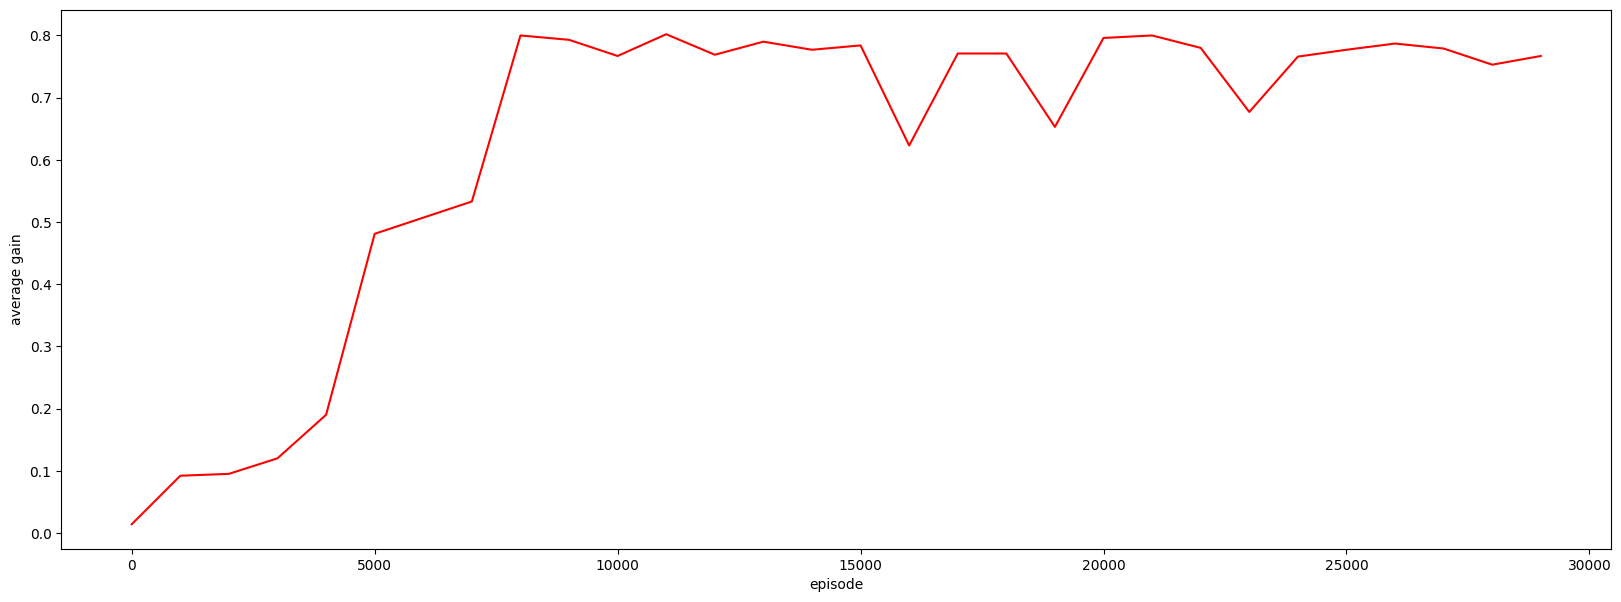

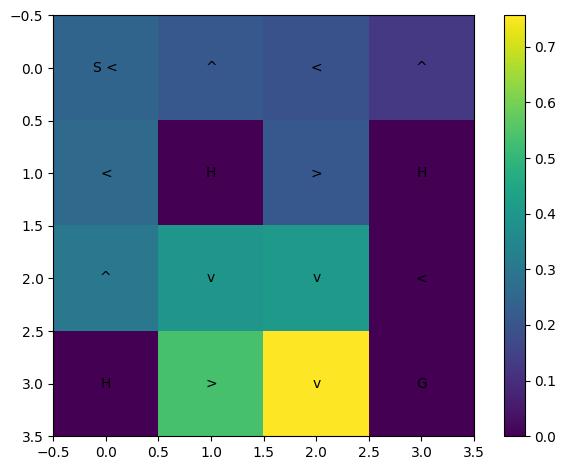

Episode finished after 37 average iterations
Average obtained rewards: 0.646


In [20]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q1,evaluation1,gamma=1)

In [21]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_sarsa.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_sarsa.gif", fps=10)

MoviePy - Building file FrozenLake_sarsa.gif with imageio.


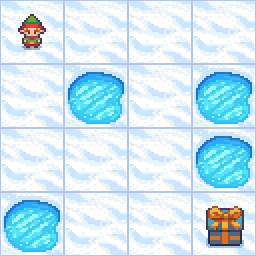

In [22]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_sarsa.gif")

#### Q Learning

In [23]:
# Melakukan algoritma Q-Learning dan menyimpan hasilnya dalam variabel q2 dan evaluation2
q2,evaluation2=Q_learning(1,30000,numStates)

  0%|          | 0/30000 [00:00<?, ?it/s]

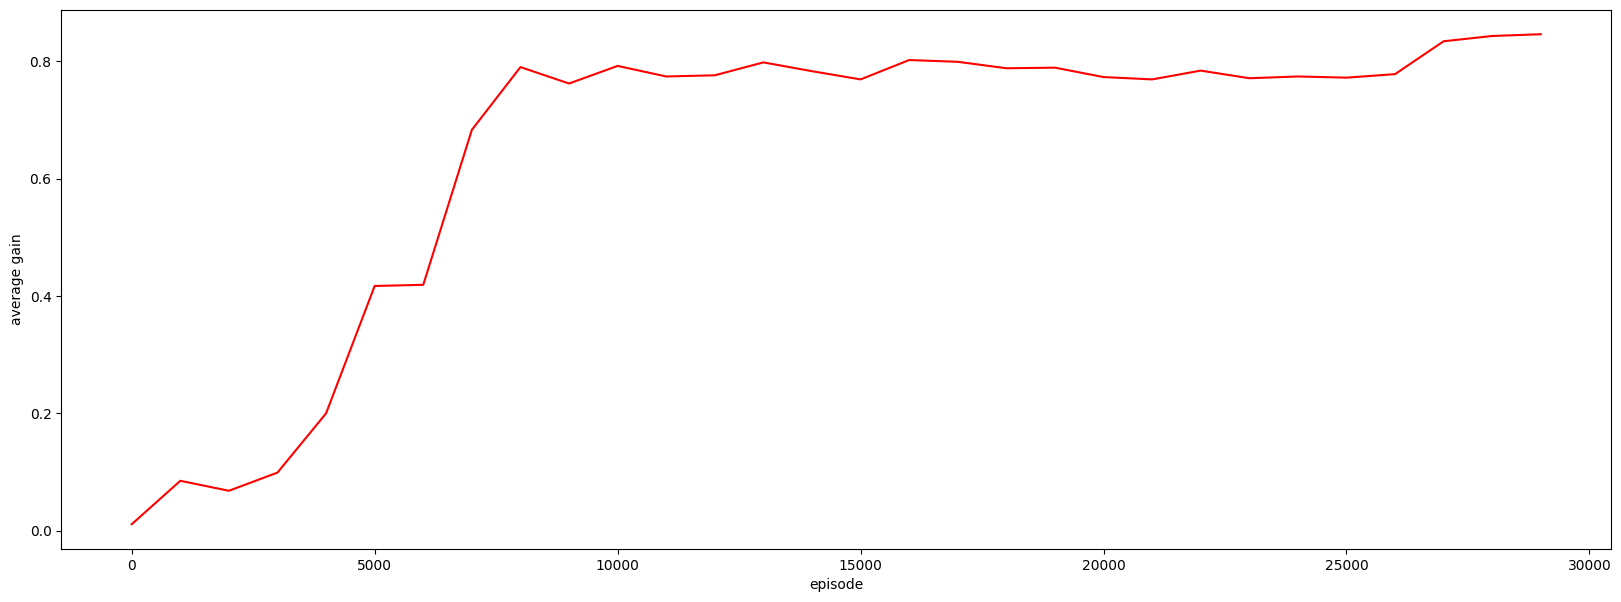

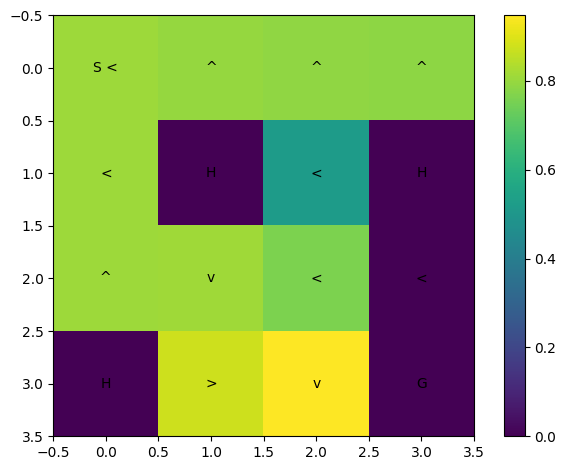

Episode finished after 48 average iterations
Average obtained rewards: 0.84


In [24]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q2,evaluation2)

In [25]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_q_learning.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_q_learning.gif", fps=10)

MoviePy - Building file FrozenLake_q_learning.gif with imageio.


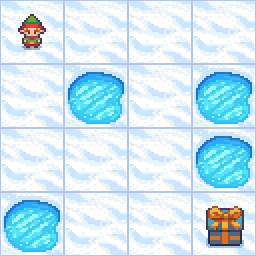

In [26]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_q_learning.gif")

#### Monte Carlo on policy

In [27]:
# Melakukan algoritma Monte Carlo On-Policy dan menyimpan hasilnya dalam variabel q3 dan evaluation3
q3,evaluation3=onPolicyMC(1,30000,numStates)

  0%|          | 0/30000 [00:00<?, ?it/s]

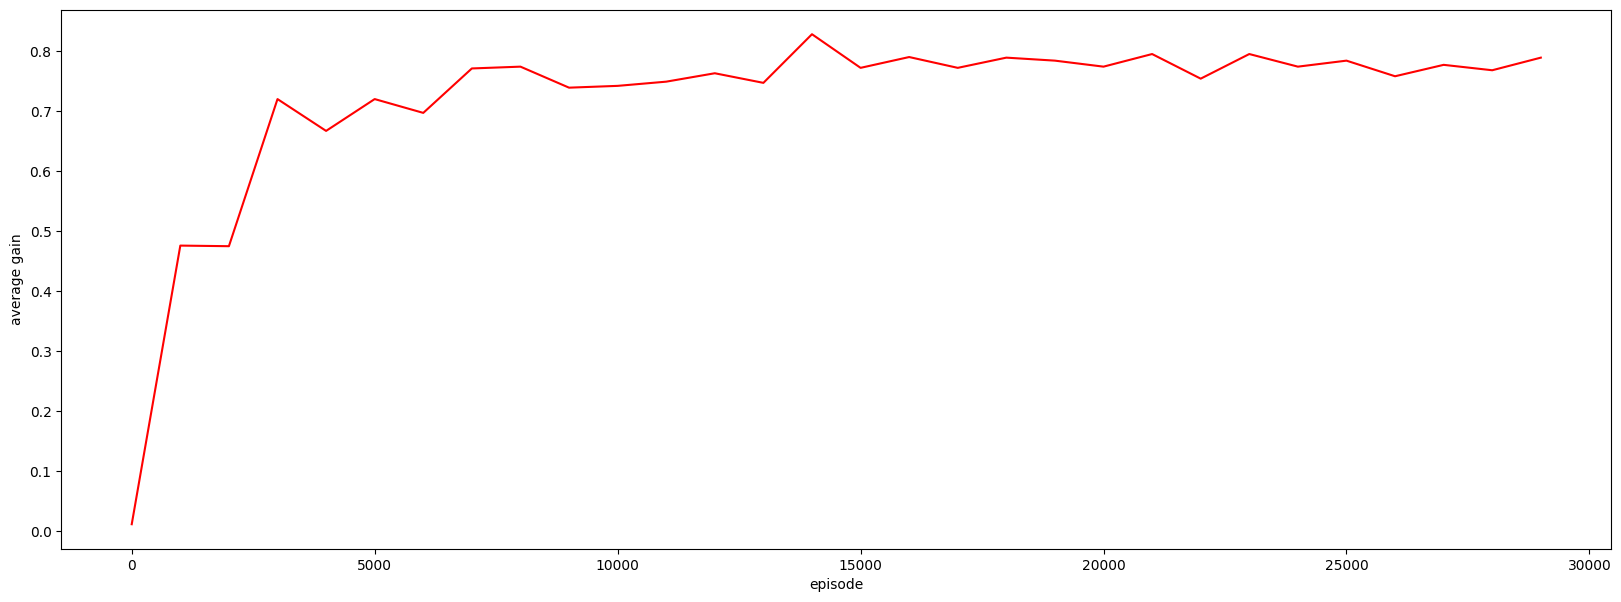

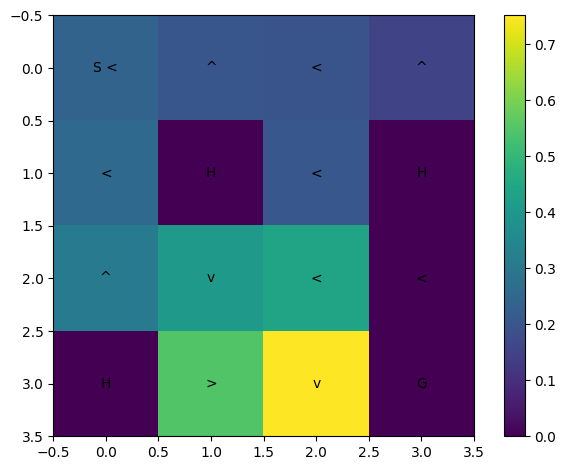

Episode finished after 43 average iterations
Average obtained rewards: 0.774


In [28]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q3,evaluation3)

In [29]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_MC.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_MC.gif", fps=10)

MoviePy - Building file FrozenLake_MC.gif with imageio.


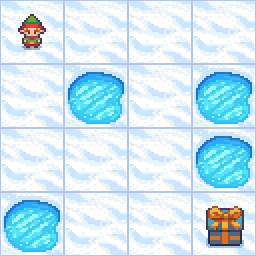

In [30]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_MC.gif")

### Frozen Lake 8X8

In [31]:
# Menutup lingkungan yang sebelumnya
env.close()

# Membuat lingkungan baru dengan FrozenLake 8x8
env = gym.make("FrozenLake8x8-v1",render_mode="rgb_array",is_slippery=True)

In [32]:
# Mendapatkan jumlah state
numStates = env.observation_space.n

#### SARSA

In [33]:
# Melakukan algoritma SARSA dan menyimpan hasilnya dalam variabel q1_ dan evaluation1_
q1_,evaluation1_=sarsa(1,30000,numStates)

  0%|          | 0/30000 [00:00<?, ?it/s]

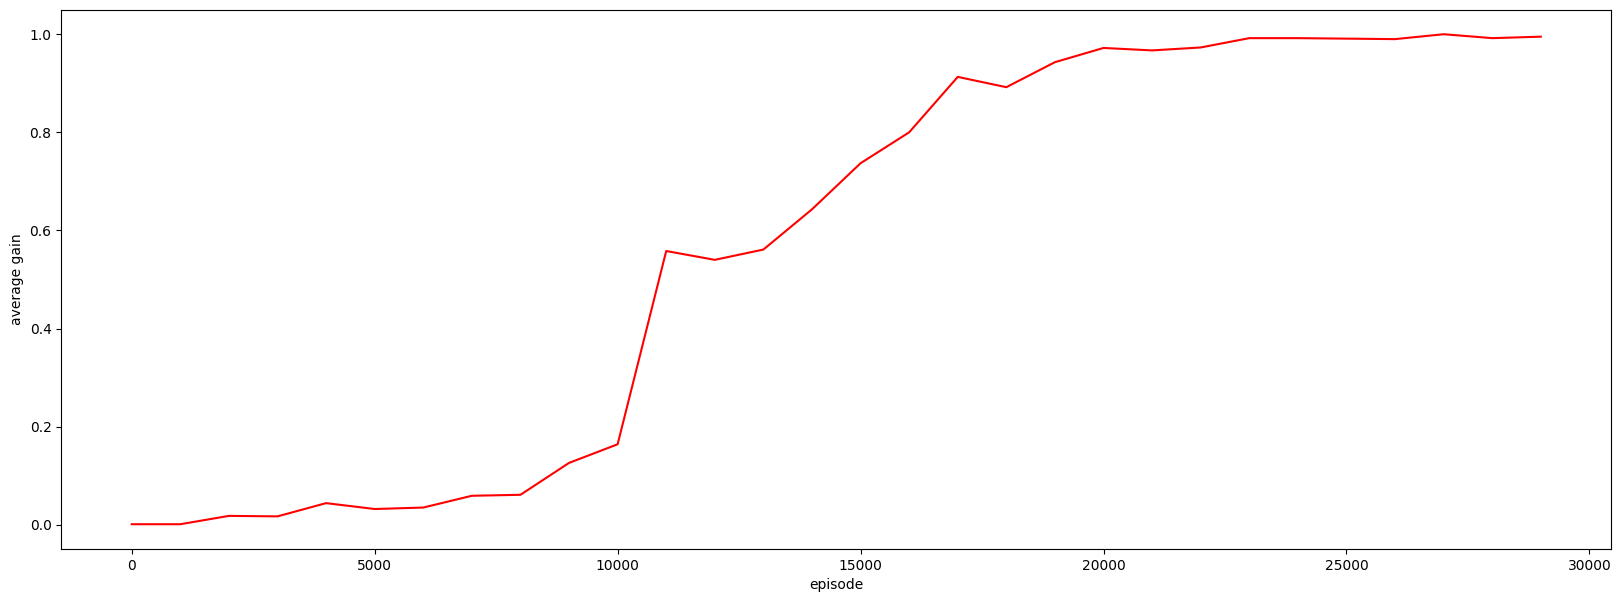

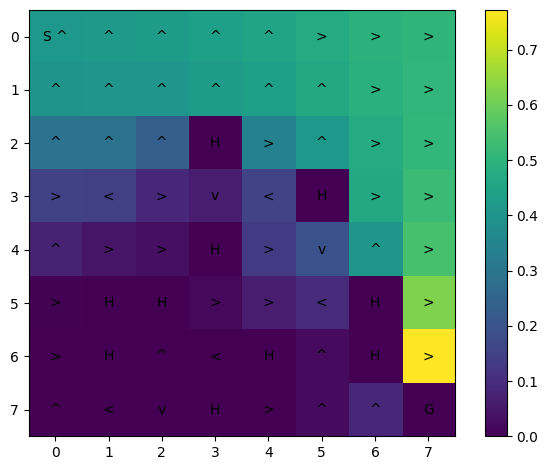

Episode finished after 138 average iterations
Average obtained rewards: 0.991


In [34]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q1_,evaluation1_,8)

In [35]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_sarsa8x8.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_sarsa8x8.gif", fps=10)

MoviePy - Building file FrozenLake_sarsa8x8.gif with imageio.


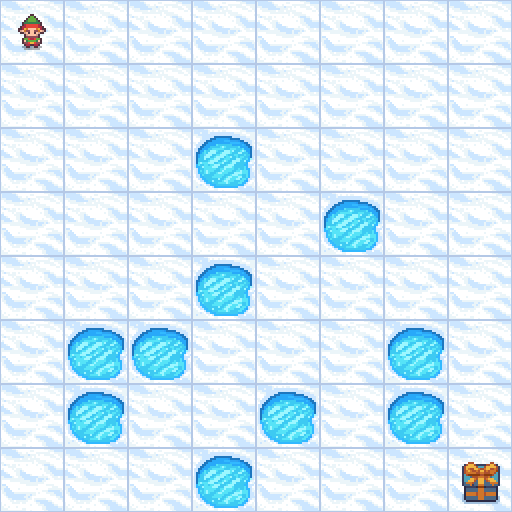

In [36]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_sarsa8x8.gif")

#### Q Learning

In [37]:
# Melakukan algoritma Q-Learning dan menyimpan hasilnya dalam variabel q2_ dan evaluation2_
q2_,evaluation2_=Q_learning(1,30000,numStates)

  0%|          | 0/30000 [00:00<?, ?it/s]

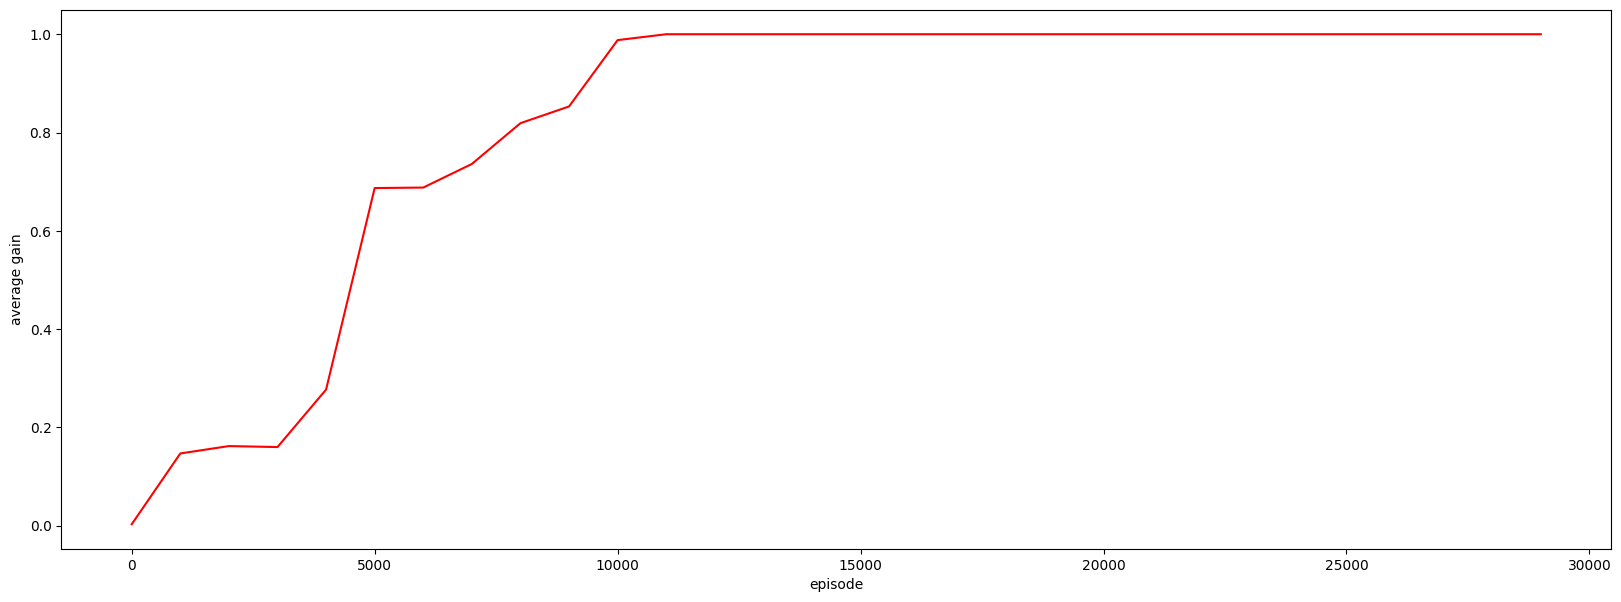

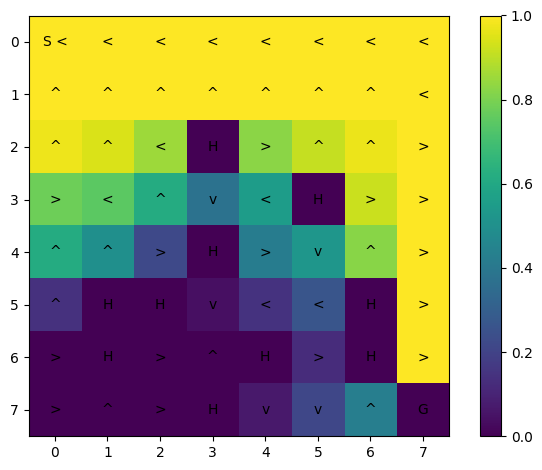

Episode finished after 362 average iterations
Average obtained rewards: 1.0


In [38]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q2_,evaluation2_,8)

In [39]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_q_learning8x8.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_q_learning8x8.gif", fps=10)

MoviePy - Building file FrozenLake_q_learning8x8.gif with imageio.


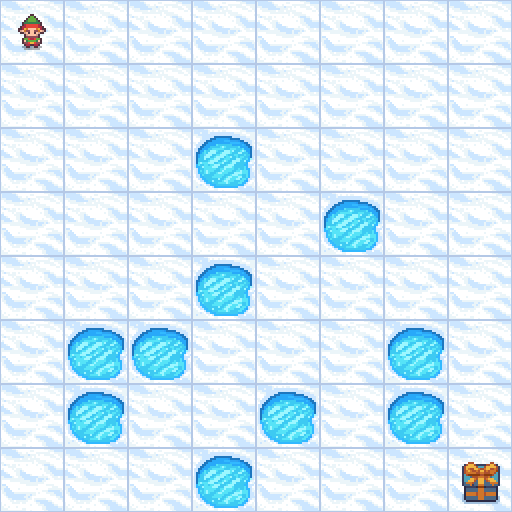

In [40]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_q_learning8x8.gif")

#### Monte Carlo on Policy

In [41]:
# Melakukan algoritma Monte Carlo On-Policy dan menyimpan hasilnya dalam variabel q3_ dan evaluation3_
q3_,evaluation3_=onPolicyMC(1,30000,numStates)

  0%|          | 0/30000 [00:00<?, ?it/s]

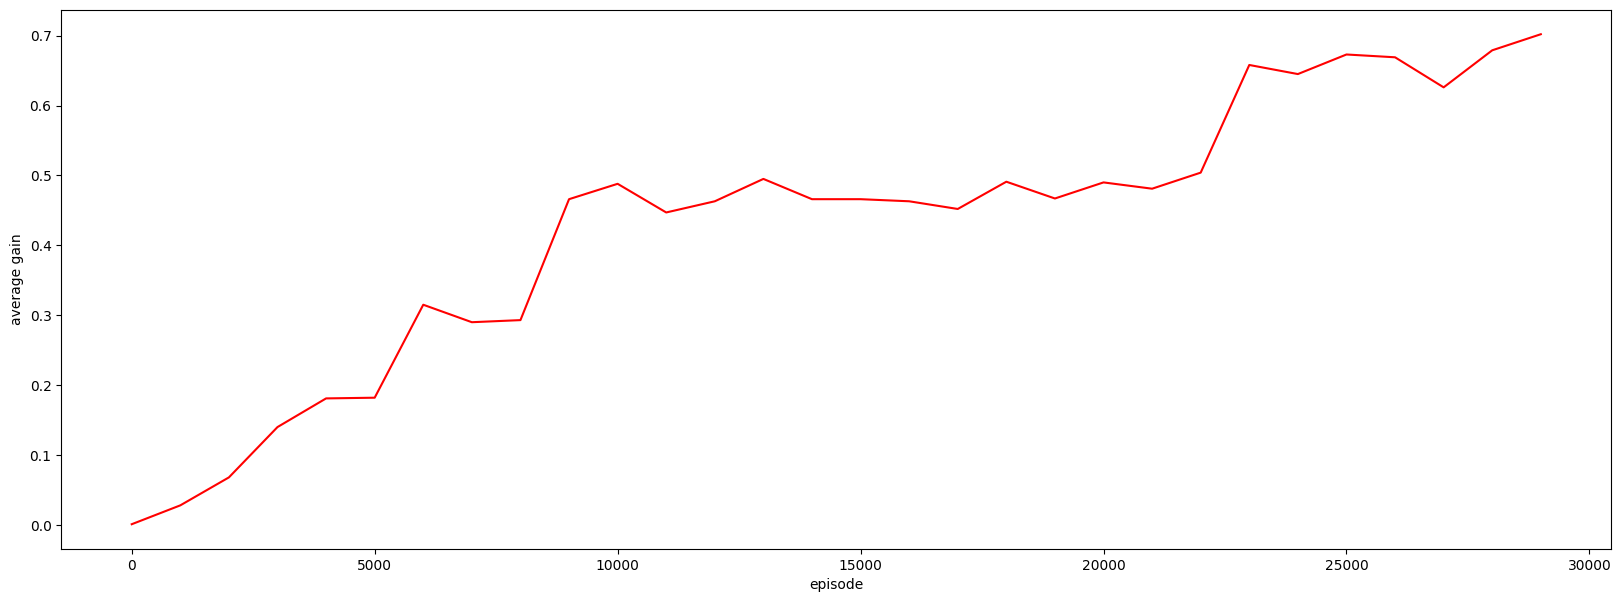

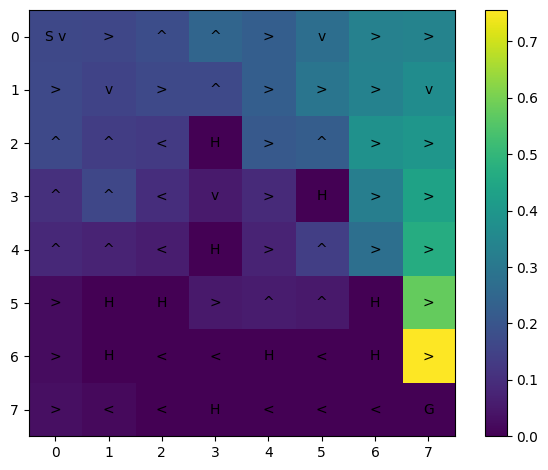

Episode finished after 88 average iterations
Average obtained rewards: 0.702


In [42]:
# Membuat plot dari hasil evaluasi dan menyimpannya dalam variabel frame
frame=plot(q3_,evaluation3_,8)

In [43]:
# Membuat GIF dari frame dan menyimpannya dengan nama "FrozenLake_MC.gif"
clip=ImageSequenceClip(frame, fps=10).resize(1.0)
clip.write_gif("FrozenLake_MC.gif", fps=10)

MoviePy - Building file FrozenLake_MC.gif with imageio.


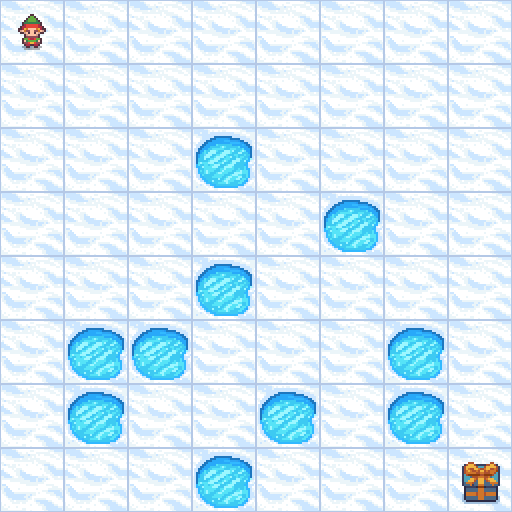

In [44]:
# Menampilkan GIF yang telah dibuat
Image(filename="FrozenLake_MC.gif")

## Comparasion

### Comparasion of Frozen Lake 4x4

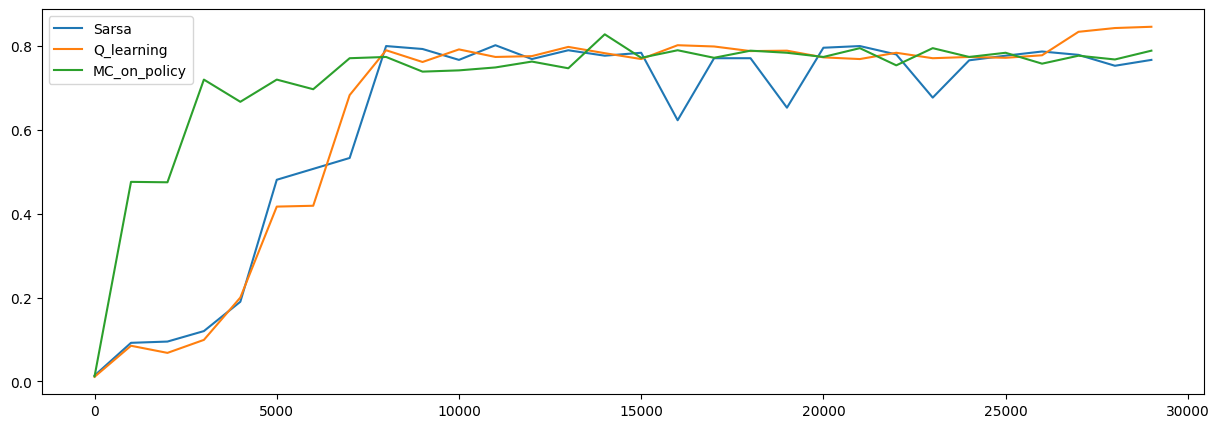

In [45]:
# Membuat plot untuk membandingkan hasil evaluasi dari ketiga algoritma pada lingkungan 4x4
plt.figure(figsize=(15,5))
plt.plot([i * 1000 for i in range(len(evaluation1))],evaluation1) # Membuat plot dari hasil evaluasi algoritma SARSA
plt.plot([i * 1000 for i in range(len(evaluation2))],evaluation2) # Membuat plot dari hasil evaluasi algoritma Q-Learning
plt.plot([i * 1000 for i in range(len(evaluation3))],evaluation3) # Membuat plot dari hasil evaluasi algoritma Monte Carlo On-Policy
plt.legend(["Sarsa","Q_learning","MC_on_policy"])

### Comparasion of Frozen Lake 8x8

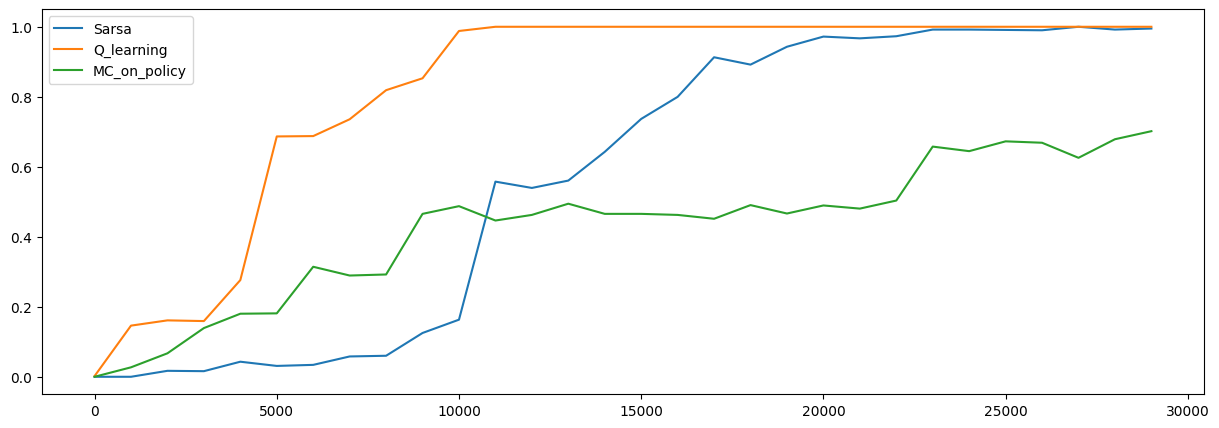

In [46]:
# Membuat plot untuk membandingkan hasil evaluasi dari ketiga algoritma pada lingkungan 8x8
plt.figure(figsize=(15,5))
plt.plot([i * 1000 for i in range(len(evaluation1_))],evaluation1_) # Membuat plot dari hasil evaluasi algoritma SARSA
plt.plot([i * 1000 for i in range(len(evaluation2_))],evaluation2_) # Membuat plot dari hasil evaluasi algoritma Q-Learning
plt.plot([i * 1000 for i in range(len(evaluation3_))],evaluation3_) # Membuat plot dari hasil evaluasi algoritma Monte Carlo On-Policy
plt.legend(["Sarsa","Q_learning","MC_on_policy"])

## **RESULTS FROZEN LAKE**

Didalam kode ini menggunakan tiga metode pembelajaran penguatan - SARSA, Q-Learning, dan Monte Carlo On-Policy - untuk menyelesaikan lingkungan FrozenLake dari OpenAI Gym. 

Lingkungan ini adalah grid 4x4 atau 8x8 di mana agen harus mencapai tujuan tanpa jatuh ke dalam lubang. Setiap metode mencoba mempelajari kebijakan yang optimal untuk mencapai tujuan ini. 

Hasilnya ditampilkan dalam bentuk grafik yang menunjukkan rata-rata penghargaan yang diperoleh selama pelatihan, dan juga dalam bentuk animasi yang menunjukkan bagaimana agen bergerak di lingkungan berdasarkan kebijakan yang dipelajari.

Dan hasilnya Reinforcement Learning berhasil mempelajari kebijakan yang cukup baik untuk menavigasi lingkungan dengan sukses, dan mendapatkan hasol seperti yang ada di gambar comparasion, yang dimana Q_learning cukup bagus dibandingkan sarsa dan Monte Carlo, yang dimana dalam episode yang rendah avarage gainnya langsung meningkat

# **Cart-pole in tabular**

In [47]:
env.close() # Menutup lingkungan yang sebelumnya
env = gym.make("CartPole-v1",render_mode= 'rgb_array') # Membuat lingkungan baru dengan CartPole

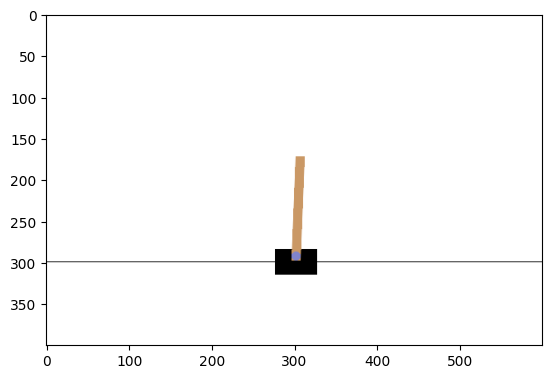

In [48]:
env.reset() # Menginisialisasi lingkungan
plt.imshow(env.render()) # Menampilkan lingkungan

environment with  2  actions
the space of states is coded with a class Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32) which represents a continuous space
the state is a vector of 4 values [ 3.5130734e+00 -3.2125574e+38 -1.5111980e-02  1.0101089e+38]
the lower bounds of the intervals are:  [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
the upper bounds of the intervals are:  [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


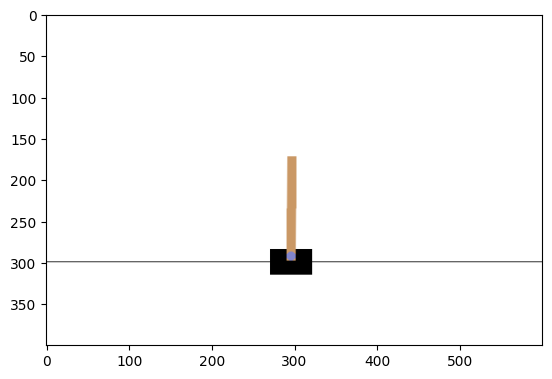

In [49]:
print("environment with ", env.action_space.n, " actions") # Menampilkan jumlah aksi yang dapat dilakukan
print("the space of states is coded with a class", env.observation_space, 
       "which represents a continuous space") # Menampilkan ruang state yang dapat ditempuh
print("the state is a vector of 4 values", env.observation_space.sample()) # Menampilkan contoh state
print("the lower bounds of the intervals are: ", env.observation_space.low) # Menampilkan batas bawah dari interval
print("the upper bounds of the intervals are: ",env.observation_space.high) # Menampilkan batas atas dari interval
env.reset() # Menginisialisasi lingkungan
plt.imshow(env.render()) # Menampilkan lingkungan

In [50]:
nbr=0 # Inisialisasi variabel untuk menghitung jumlah iterasi
done=False # Inisialisasi variabel untuk menandakan apakah episode telah selesai
while not done: # Melakukan iterasi selama episode belum selesai
    obs, reward, done,_,_ = env.step(np.random.randint(2)) # Melakukan aksi secara acak
    nbr+=1 # Menambahkan jumlah iterasi
print("Episode ended after {} iterations".format(nbr)) # Menampilkan jumlah iterasi yang telah dilakukan
env.close() # Menutup lingkungan yang sebelumnya

Episode ended after 15 iterations


In [51]:
state = env.reset() # Menginisialisasi lingkungan
state # Menampilkan state awal

(array([-0.01349759,  0.04250308,  0.04161211, -0.0134709 ], dtype=float32),
 {})

#### discretisation state

In [52]:
# Fungsi untuk mendiskritkan rentang nilai
def discritiser_range(xmin, xmax, num_bins):
    # Membuat array dengan titik-titik yang merata dalam interval yang diberikan
    return np.linspace(xmin, xmax, num_bins + 1)[1:-1]

In [53]:
# Fungsi untuk mendiskritkan nilai
def discritizer_valeur(value, bins):
    # Mengembalikan indeks bin yang berisi nilai yang diberikan
    return np.digitize(x=value, bins=bins)

In [54]:

# Fungsi untuk mengubah keadaan yang berkelanjutan menjadi keadaan yang diskrit
def encode(state):
    L=[]
    for i, feature in enumerate(state):
        # Mendiskritkan setiap fitur dan menambahkannya ke daftar
        L.append(discritizer_valeur(feature, state_bins[i]) * ((max_bins + 1) ** i))
    # Mengembalikan jumlah dari semua fitur yang telah didiskritkan
    return(sum(L))

In [55]:
# Menentukan jumlah nilai diskrit yang bisa diambil oleh setiap fitur
Nval = 10 

# Mendiskritkan setiap fitur dalam ruang keadaan
state_bins = [
            discritiser_range(-1, 1, Nval), # posisi kereta
            discritiser_range(-2, 2, Nval), # kecepatan kereta
            discritiser_range(-0.2095, 0.295, Nval), # sudut tiang
            discritiser_range(-2, 2, Nval) # kecepatan ujung tiang
]

# Menghitung jumlah maksimum bin di antara semua fitur
max_bins = max(len(bin) for bin in state_bins)

# Menghitung jumlah total keadaan diskrit
numStates= (max_bins + 1) ** len(state_bins)

# Menampilkan jumlah total keadaan diskrit
print("The number of states here will be ", numStates)

The number of states here will be  10000


#### SARSA

In [56]:
# Mendefinisikan parameter untuk algoritma SARSA
gamma=0.9 
nbr=15000
Nombre_etat=numStates
alpha=0.02
eps=0.2
nbr_eval=1000
nbr_iteration=True
eps_variable=False
freq_eval=1000

In [57]:
# Melakukan pelatihan dengan algoritma SARSA dan menyimpan hasil evaluasi
q_1_,evaluation_1_= sarsa(gamma,nbr,Nombre_etat,alpha,eps,nbr_eval,nbr_iteration,eps_variable,freq_eval)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [58]:
# Mengubah bentuk hasil evaluasi menjadi array 2D
evaluation_1_=np.array(evaluation_1_).reshape(-1,2)

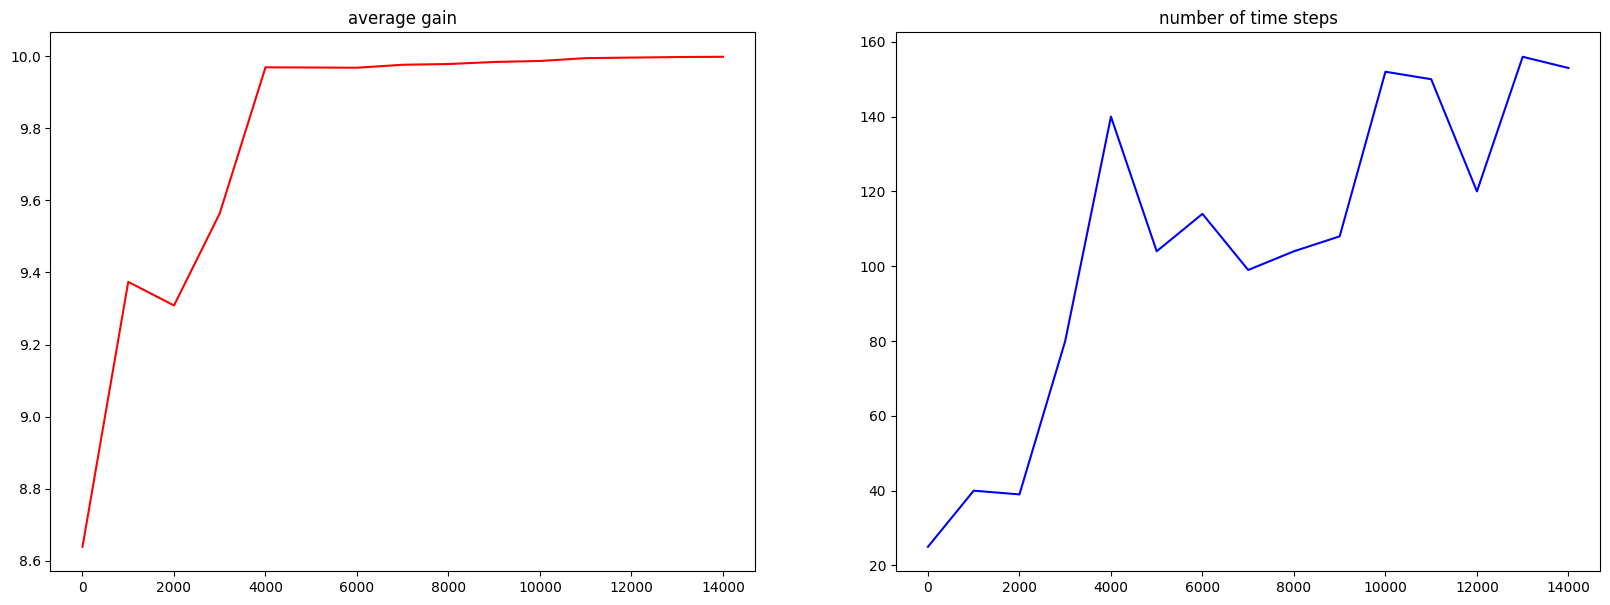

Episode finished after 134 average iterations
Average obtained rewards: 9.994126954395771
MoviePy - Building file Cart-pole_sarsa.gif with imageio.


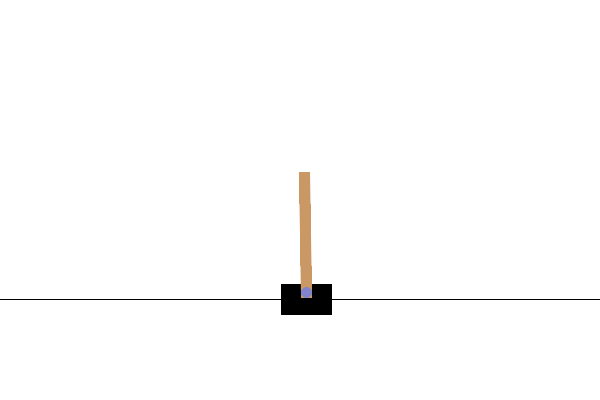

In [59]:
# Membuat plot dari hasil evaluasi dan menyimpannya sebagai GIF
frame=plot(q_1_,evaluation_1_,plot_Q=False,gamma=0.9) # Membuat plot dari hasil evaluasi
clip=ImageSequenceClip(frame, fps=10).resize(1.0) # Mengubah plot menjadi GIF
clip.write_gif("Cart-pole_sarsa.gif", fps=10) # Menyimpan GIF
Image(filename="Cart-pole_sarsa.gif") # Menampilkan GIF


#### Q Learning

In [60]:
# Mendefinisikan parameter untuk algoritma Q-Learning
gamma=0.9
nbr=15000
Nombre_etat=numStates
alpha=0.02
eps=0.2
nbr_eval=1000
nbr_iteration=True
eps_variable=False
freq_eval=1000

In [61]:
# Melakukan pelatihan dengan algoritma Q-Learning dan menyimpan hasil evaluasi
q_2_,evaluation_2_=Q_learning(gamma,nbr,Nombre_etat,alpha,eps,nbr_eval,nbr_iteration,eps_variable)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [62]:
# Mengubah bentuk hasil evaluasi menjadi array 2D
evaluation_2_=np.array(evaluation_2_).reshape(-1,2)

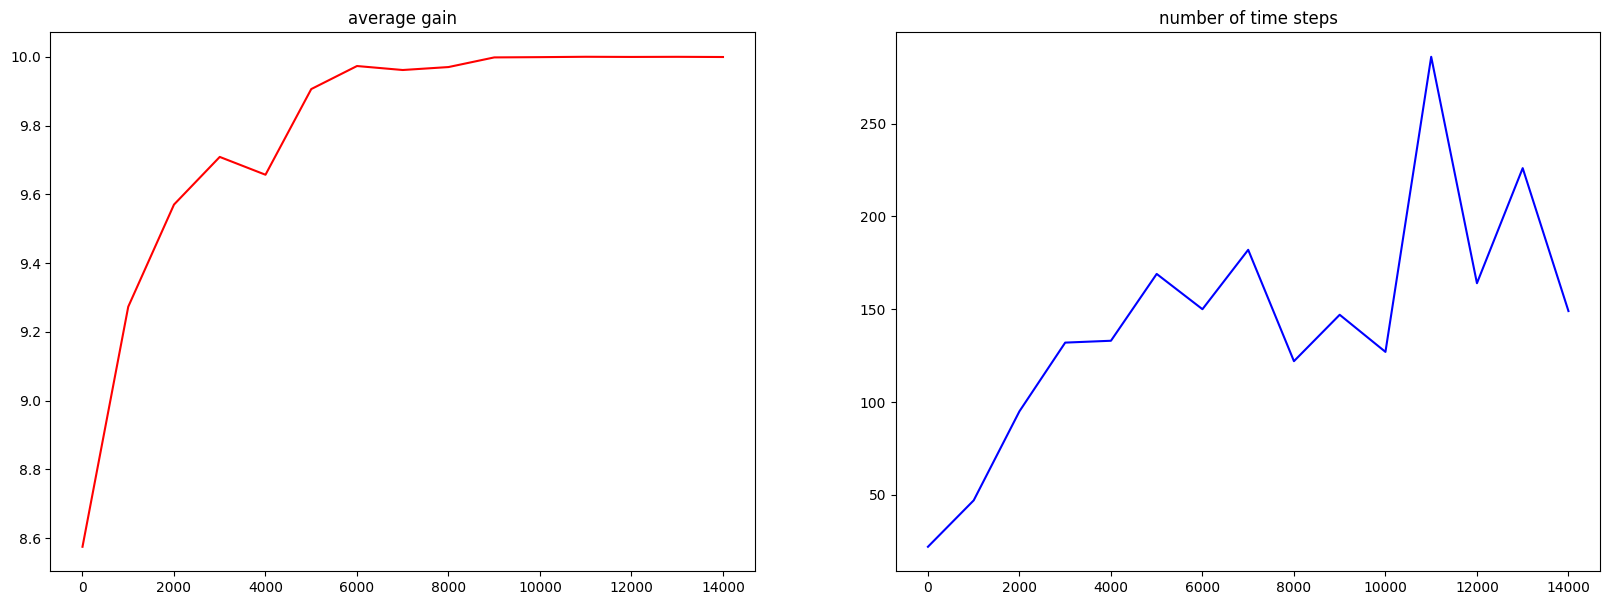

Episode finished after 158 average iterations
Average obtained rewards: 9.999562167539588
MoviePy - Building file Cart-pole_Q_learning.gif with imageio.


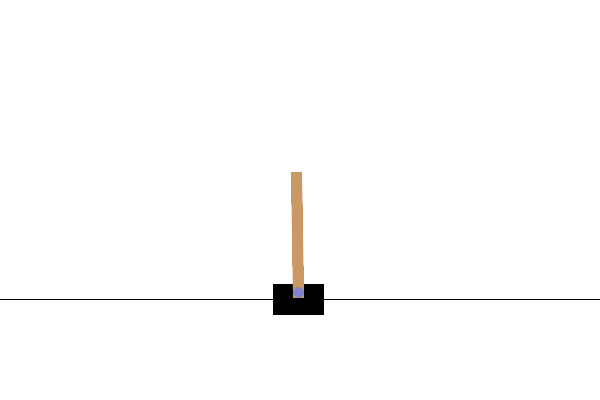

In [63]:
# Membuat plot dari hasil evaluasi dan menyimpannya sebagai GIF
frame=plot(q_2_,evaluation_2_,plot_Q=False,gamma=0.9) # Membuat plot dari hasil evaluasi
clip=ImageSequenceClip(frame, fps=10).resize(1.0) # Mengubah plot menjadi GIF
clip.write_gif("Cart-pole_Q_learning.gif", fps=10) # Menyimpan GIF
Image(filename="Cart-pole_Q_learning.gif") # Menampilkan GIF

#### Monte Carlo on Policy

In [64]:
# Mendefinisikan parameter untuk algoritma Monte Carlo On-Policy
gamma=0.9
nbr=15000
Nombre_etat=numStates
eps=0.2
nbr_eval=1000
nbr_iteration=True
eps_variable=False
freq_eval=1000

In [65]:
# Melakukan pelatihan dengan algoritma Monte Carlo On-Policy dan menyimpan hasil evaluasi
q_3_,evaluation_3_=onPolicyMC(gamma,nbr,Nombre_etat,eps,nbr_iteration,eps_variable,freq_eval)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [66]:
# Mengubah bentuk hasil evaluasi menjadi array 2D
evaluation_3_=np.array(evaluation_3_).reshape(-1,2)

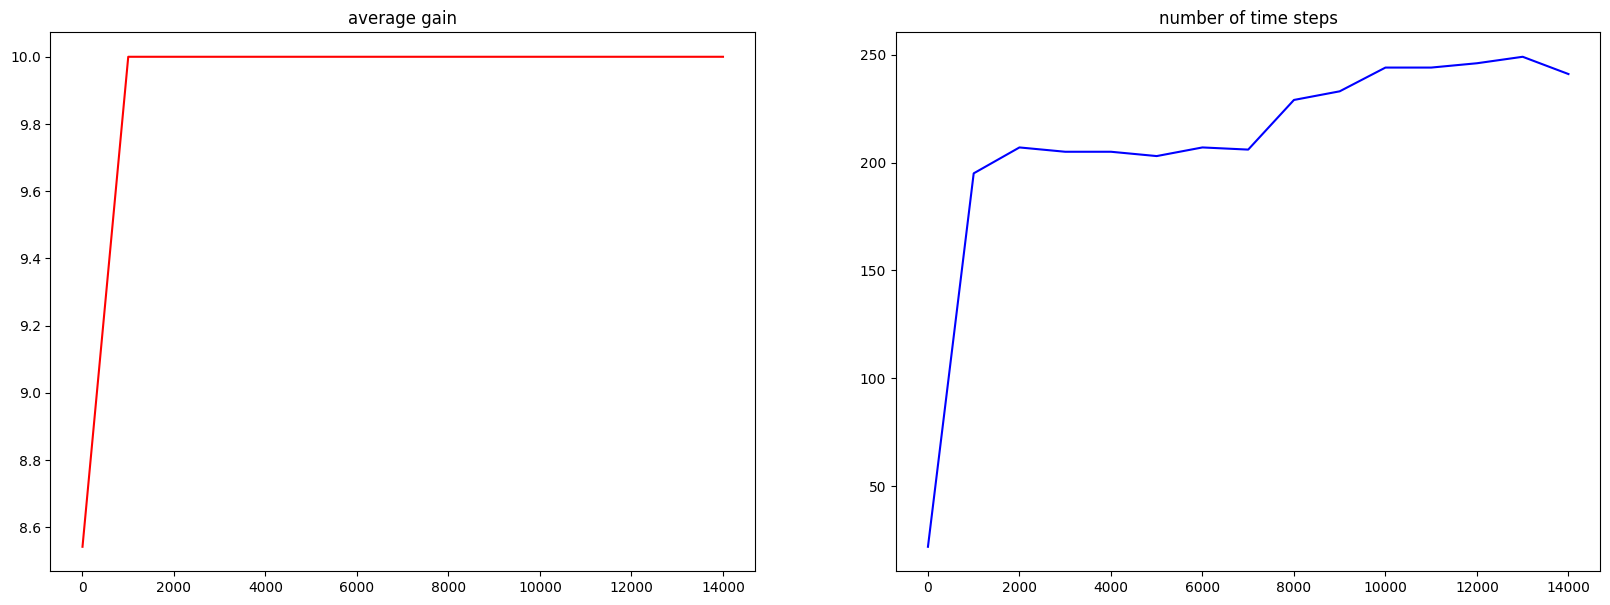

Episode finished after 243 average iterations
Average obtained rewards: 9.999999980253289
MoviePy - Building file Cart-pole_MC.gif with imageio.


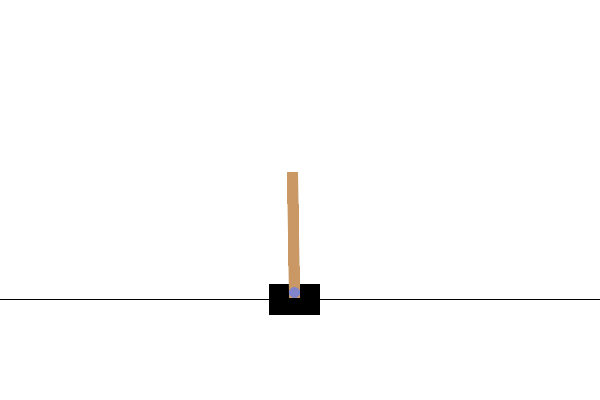

In [67]:
# Membuat plot dari hasil evaluasi dan menyimpannya sebagai GIF
frame=plot(q_3_,evaluation_3_,plot_Q=False,gamma=0.9) # Membuat plot dari hasil evaluasi
clip=ImageSequenceClip(frame, fps=10).resize(1.0) # Mengubah plot menjadi GIF
clip.write_gif("Cart-pole_MC.gif", fps=10) # Menyimpan GIF
Image(filename="Cart-pole_MC.gif") # Menampilkan GIF

## **Comparasion**

Text(0.5, 1.0, 'average gain')

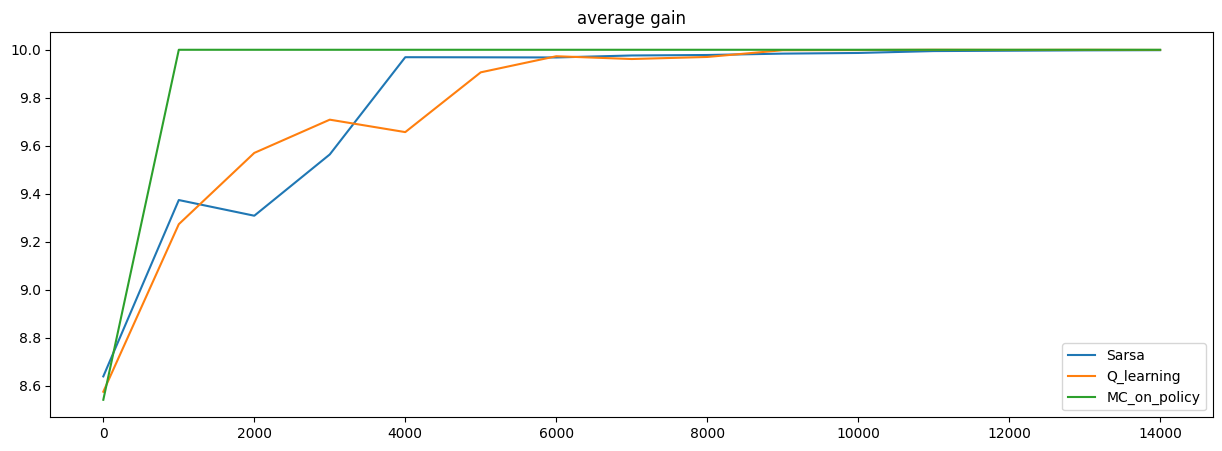

In [68]:
# Membuat figure dengan ukuran 15x5
plt.figure(figsize=(15,5))

# Membuat plot untuk rata-rata gain dari setiap algoritma
plt.plot([i * 1000 for i in range(len(evaluation_1_))],evaluation_1_[:,0]) # Membuat plot untuk algoritma SARSA
plt.plot([i * 1000 for i in range(len(evaluation_2_))],evaluation_2_[:,0]) # Membuat plot untuk algoritma Q-Learning
plt.plot([i * 1000 for i in range(len(evaluation_3_))],evaluation_3_[:,0]) # Membuat plot untuk algoritma Monte Carlo On-Policy

# Menambahkan legenda untuk plot
plt.legend(["Sarsa","Q_learning","MC_on_policy"])

# Menambahkan judul untuk plot
plt.title("average gain")

Text(0.5, 1.0, 'average number of steps')

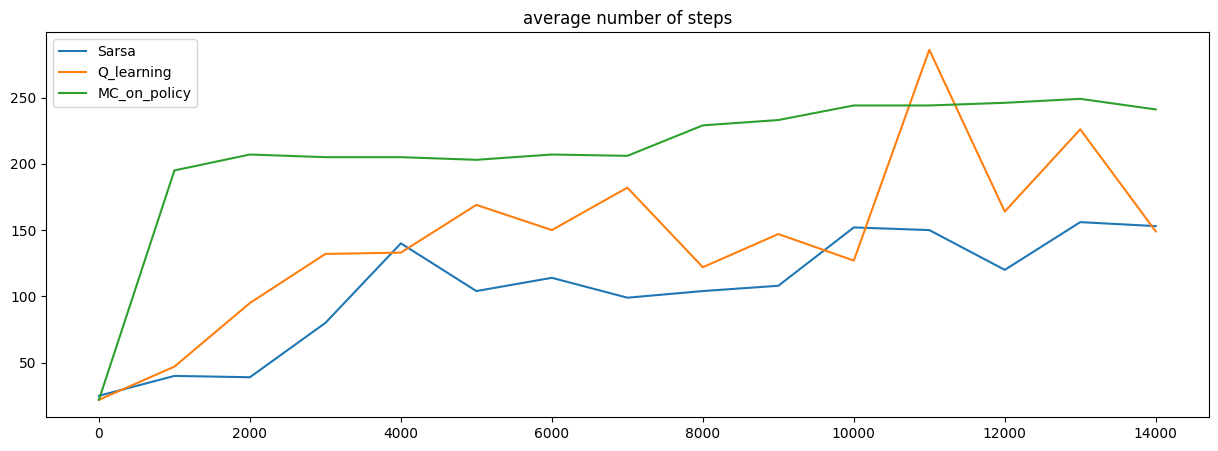

In [69]:
# Membuat figure baru dengan ukuran 15x5
plt.figure(figsize=(15,5))

# Membuat plot untuk rata-rata jumlah langkah dari setiap algoritma
plt.plot([i * 1000 for i in range(len(evaluation_1_))],evaluation_1_[:,1]) # Membuat plot untuk algoritma SARSA
plt.plot([i * 1000 for i in range(len(evaluation_2_))],evaluation_2_[:,1]) # Membuat plot untuk algoritma Q-Learning
plt.plot([i * 1000 for i in range(len(evaluation_3_))],evaluation_3_[:,1]) # Membuat plot untuk algoritma Monte Carlo On-Policy

# Menambahkan legenda untuk plot
plt.legend(["Sarsa","Q_learning","MC_on_policy"])

# Menambahkan judul untuk plot
plt.title("average number of steps")

## **RESULTS CART POLE**

Sama seperti diatas penerapan kode ini menggunakan metode SARSA, Q-Learning, dan Monte Carlo On-Policy, tetapi kali ini untuk menyelesaikan lingkungan CartPole dari OpenAI Gym. 

Dalam lingkungan ini, agen harus menjaga tiang tetap tegak dengan menggerakkan kereta ke kiri atau ke kanan. Karena ruang keadaan CartPole adalah kontinu, kode ini juga mencakup proses diskritisasi untuk mengubah ruang keadaan kontinu menjadi diskrit. 

Hasilnya ditampilkan dalam bentuk grafik yang menunjukkan rata-rata penghargaan yang diperoleh selama pelatihan, dan juga dalam bentuk animasi yang menunjukkan bagaimana agen bergerak di lingkungan berdasarkan kebijakan yang dipelajari.

Dan hasilnya Reinforcement Learning berhasil mempelajari kebijakan yang cukup baik untuk menavigasi lingkungan dengan sukses, dan mendapatkan hasol seperti yang ada di gambar comparasion, yang dimana Monte Calro cukup bagus untuk rata rata stepsnya dibandingkan sarsa dan q laerning, yang dimana dalam episode yang rendah avarage gainnya langsung meningkat dan stabil

# RESULTS

Dalam kedua kasus, metode Reinforcment Learning berhasil mempelajari kebijakan yang cukup baik untuk menavigasi lingkungan dengan sukses. Namun, efektivitas metode tertentu dapat bervariasi tergantung pada lingkungan dan parameter yang digunakan dalam pelatihan. dalam hal ini mungkin bisa melakukan berbagai percobaan lagi untuk mendapatkan hasil yang lebih baik lagi.

# REFERENCES:
[1] https://ieeexplore.ieee.org/document/9558862/

[2] https://link.springer.com/book/10.1007/978-1-4842-5127-0